In [1]:
import os
import pandas as pd
from scipy.sparse import coo_array

In [2]:
def get_gene_burden_df(gene_burden_file, gene_file):
    gene_burden_df = pd.read_csv(gene_burden_file)
    gene_burden_df["len_samples"]= gene_burden_df.samples.apply(lambda x: len(x.split(",")))
    gene_df = pd.read_csv(gene_file)
    gene_length_dict = dict(zip(gene_df.gene_name, gene_df.gene_length))
    gene_burden_df["len_gene"] = gene_burden_df.gene.map(gene_length_dict)
    return gene_burden_df

In [3]:
gene_burden_file = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/genotype/data/processed_burden/all_gene_burden.csv.gz"
gene_file = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/genotype/data/gene_annotations/gencode.v44.basic.annotation.parsed.csv"

In [4]:
gene_burden_df =  get_gene_burden_df(gene_burden_file, gene_file)

In [5]:
gene_burden_df

,gene,samples,len_samples,len_gene
0,A1BG,"4579370,3524208,3492379,4854636,1712109,344643...",315,8314
1,A1CF,"3382794,2202734,4274230,3846439,3356276,455890...",360,86266
2,A2M,"5646506,4302321,2506920,4824021,2989442,574754...",1269,48565
3,A2ML1,"5842018,2209688,3873667,5826880,5539284,530795...",1355,64380
4,A3GALT2,"1544418,5070060,2193052,2968768,5949886,220554...",817,14332
...,...,...,...,...
18586,ZYG11A,"2471620,1459965,2734415,4040069,1185641,128139...",455,52487
18587,ZYG11B,"3016092,1726209,4739100,3868742,1279289,474361...",61,100883
18588,ZYX,"3133465,1280238,2753819,5105877,1237951,127195...",865,9816
18589,ZZEF1,"2423206,5147598,2480037,4963588,4770247,250541...",470,138585


In [7]:
gene_burden_df.loc[gene_burden_df.gene.str.startswith("NKX1")]

,gene,samples,len_samples,len_gene
10224,NKX1-2,"3204881,5749227,3344115,2832786,4840723,187859...",1037,4792


In [5]:
gene_burden_df.len_samples.corr(gene_burden_df.len_gene)

0.13985168773101272

<Axes: xlabel='len_samples', ylabel='len_gene'>

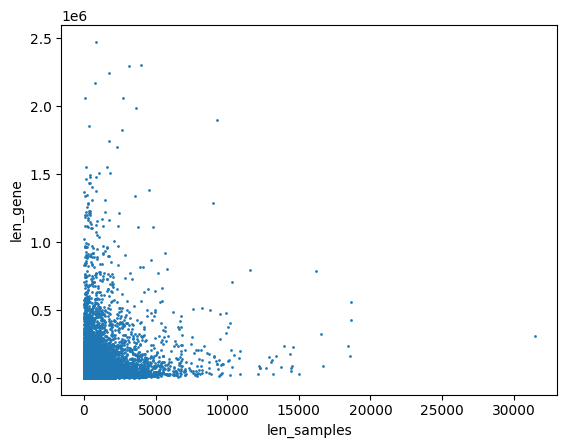

In [6]:
gene_burden_df.plot(x="len_samples", y="len_gene", kind="scatter", s=1, alpha=0.95)

array([[<Axes: title={'center': 'len_samples'}>]], dtype=object)

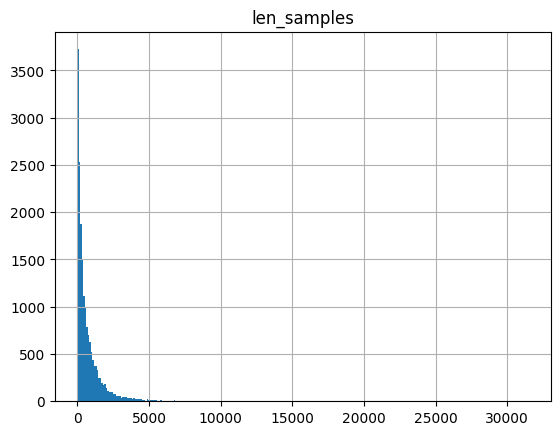

In [9]:
gene_burden_df.hist(column="len_samples", bins=300)

In [2]:
df = pd.read_csv("/data6/deepro/ukb_bmi/0_data_preparation_and_download/genotype/data/processed_burden/all_gene_burden.csv.gz", usecols=["gene", "samples"])

In [3]:
def get_sparse_df(df):
    df["samples"] = df.samples.str.split(",")
    df = df.explode("samples")
    samples_index = {s:i for i,s in enumerate(df.samples.unique())}
    gene_index = {g:i for i,g in enumerate(df.gene.unique())}
    row_index = df.samples.map(samples_index)
    col_index = df.gene.map(gene_index)
    data = [1 for i in range(len(row_index))]
    sparse_arr = coo_array((data, (row_index, col_index)), shape=(len(samples_index), len(gene_index)))
    df = pd.DataFrame.sparse.from_spmatrix(sparse_arr, index=samples_index.keys(), columns=gene_index.keys())
    return df

In [4]:
sparse_df = get_sparse_df(df)

In [12]:
df.memory_usage().sum() / 1e6

0.352084

In [13]:
sparse_df.memory_usage().sum() / 1e6

611.161528

In [15]:
sparse_df

,5S_rRNA,7SK,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa,snoZ196
1930029,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3573775,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3689467,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5679353,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3793132,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5881779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2452425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2048684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
